<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [35]:
import pickle

import stats_conf

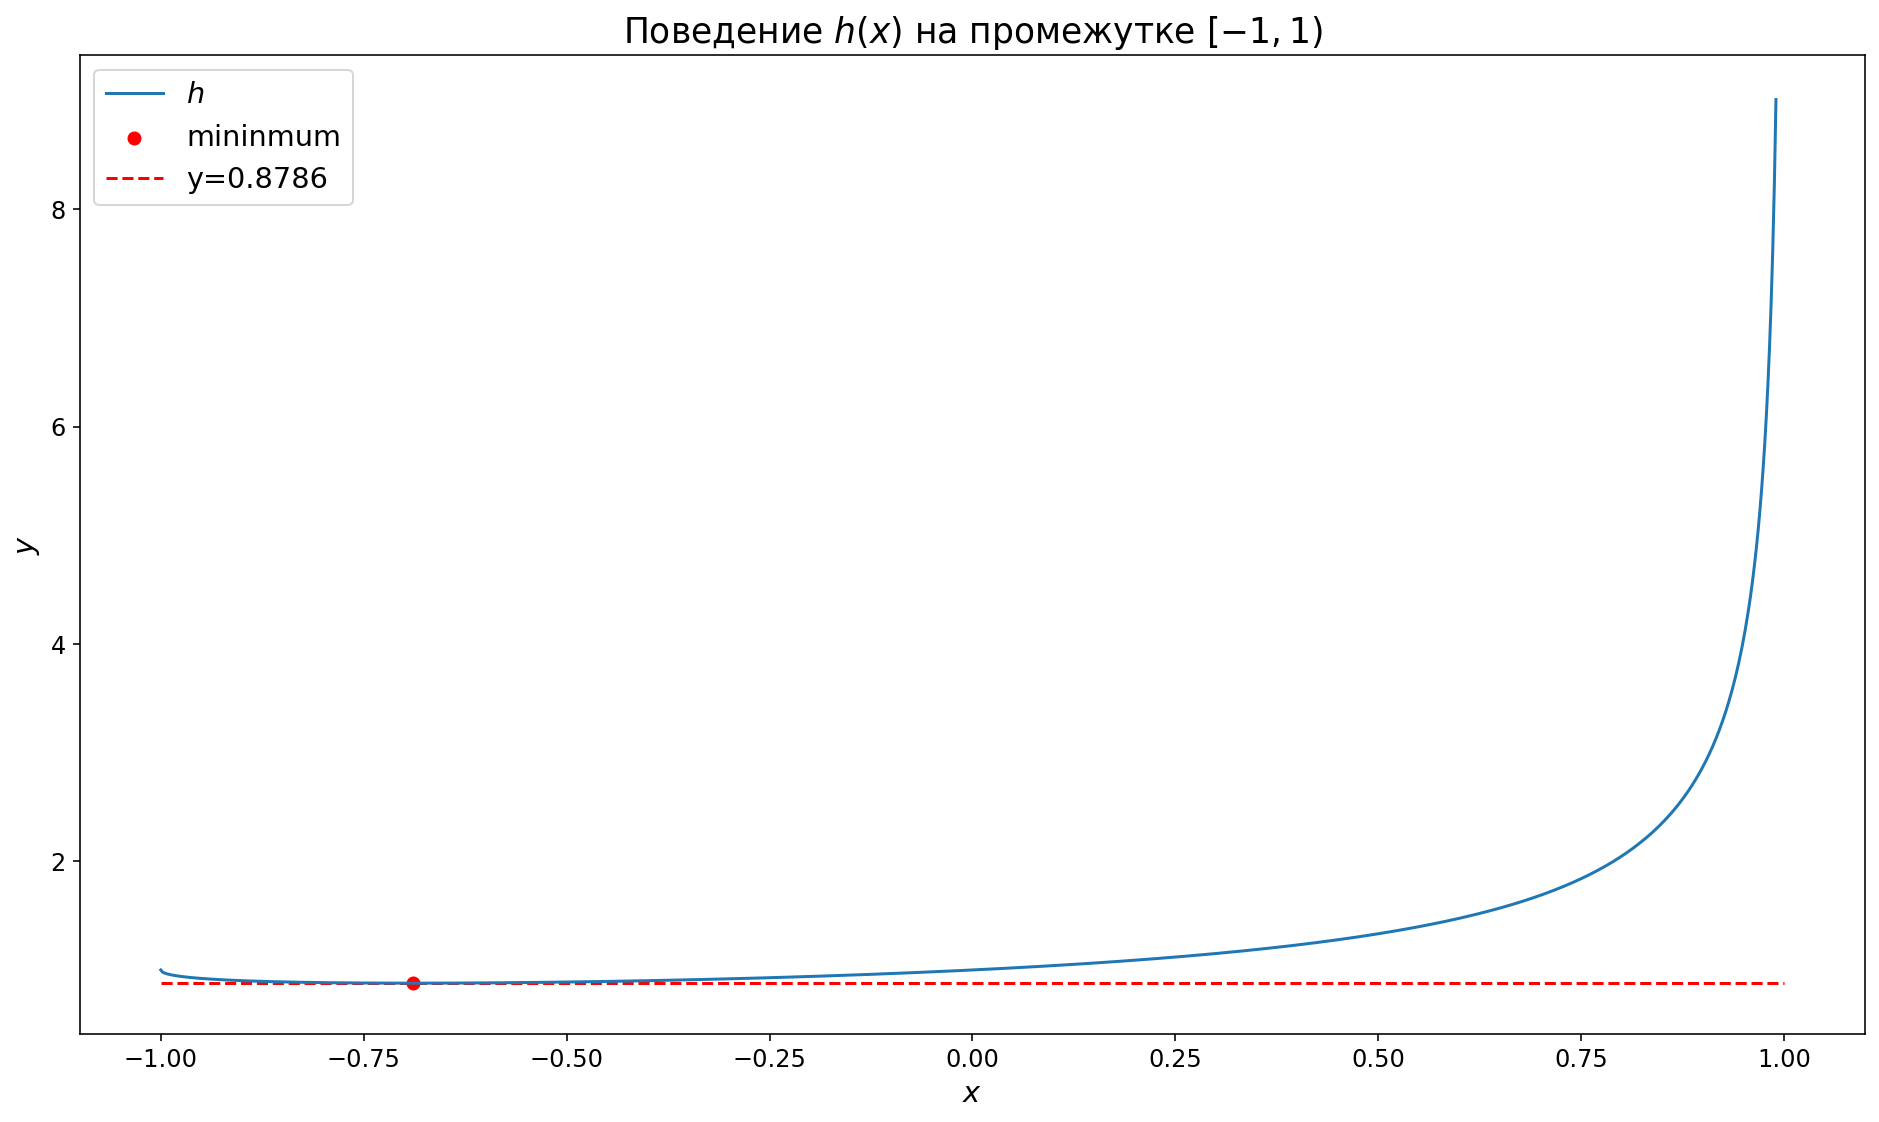

In [2]:
x = np.linspace(-1, .99, 1000)
y = 2 * np.arccos(x) / (np.pi * (1 - x))

plt.figure(figsize=(16, 9))
plt.plot(x, y, label='$h$')
plt.scatter(x[np.argmin(y)], np.min(y), label='mininmum', color='r')
plt.hlines(np.min(y), -1, 1, color='r', linestyle='--', label=f'y={np.round(np.min(y), 4)}')
plt.title('Поведение $h(x)$ на промежутке $[-1, 1)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
_ = plt.legend()
plt.savefig('h.png')

In [8]:
def load(name):
    with open('./backup/' + name, 'rb') as f:
        return pickle.load(f)

In [10]:
regular_3_10 = load('regular_3_10')
regular_3_20 = load('regular_3_20')
regular_8_10 = load('regular_8_10')
regular_8_20 = load('regular_8_20')

In [11]:
er_1_2_10 = load('er_1_2_10')
er_1_2_20 = load('er_1_2_20')
er_1_4_10 = load('er_1_4_10')
er_1_4_20 = load('er_1_4_20')
er_3_4_10 = load('er_3_4_10')
er_3_4_20 = load('er_3_4_20')

In [12]:
ba_4_10 = load('ba_4_10')
ba_4_20 = load('ba_4_20')
ba_n_2_10 = load('ba_n_2_10')
ba_n_2_20 = load('ba_n_2_20')

In [14]:
power_1_3_10 = load('power_1_3_10')
power_1_3_20 = load('power_1_3_20')
power_2_3_10 = load('power_2_3_10')
power_2_3_20 = load('power_2_3_20')

In [65]:
def process_df(df):
    cnt = 0
    for_hist = []

    for brute_res, (avg, mx) in zip(df[0], df[1]):
        if brute_res >= avg and avg >= 0.878 * brute_res:
            cnt += 1

        for_hist.append(mx * 1. / brute_res)

    return cnt, for_hist


def visualize(df10, df20, test_name):
    # Collecting the data
    cnt10, for_hist10 = process_df(df10)
    cnt20, for_hist20 = process_df(df20)

    plt.figure(figsize=(16, 9))

    # 10
    plt.subplot(1, 2, 1)
    plt.hist(for_hist10,
             # density=True,
             bins=10,
             label='$\\frac{max\\:result}{accurate\\:result}$')
    plt.xlabel('Относительная эффективность')
    plt.ylabel('$y$')
    plt.title(f'Гистограмма отношений максимумов по алгоритму\n к точному результату для модели\n {test_name} размера $10$')
    plt.legend()
    
    # 20
    plt.subplot(1, 2, 2)
    plt.hist(for_hist20,
             # density=True,
             bins=10,
             label='$\\frac{max\\:result}{accurate\\:result}$')
    plt.xlabel('Относительная эффективность')
    plt.ylabel('$y$')
    plt.title(f'Гистограмма отношений максимумов по алгоритму\n к точному результату для модели\n {test_name} размера $20$')

    plt.legend()
    plt.tight_layout()    
    
    # Table
    d = {
        "Средние, лежащие в $[0.878 c^*, c^*]$ для размера $10$, %":
        [cnt10 * 1. / 50 * 100],
        "Средние, лежащие в $[0.878 c^*, c^*]$ для размера $20$, %":
        [cnt20 * 1. / 50 * 100]
    }

    df = pd.DataFrame(data=d)

    return df

РЕГУЛЯРНЫЙ ГРАФ

,"Средние, лежащие в $[0.878 c^*, c^*]$ для размера $10$, %","Средние, лежащие в $[0.878 c^*, c^*]$ для размера $20$, %"
0,100.0,100.0


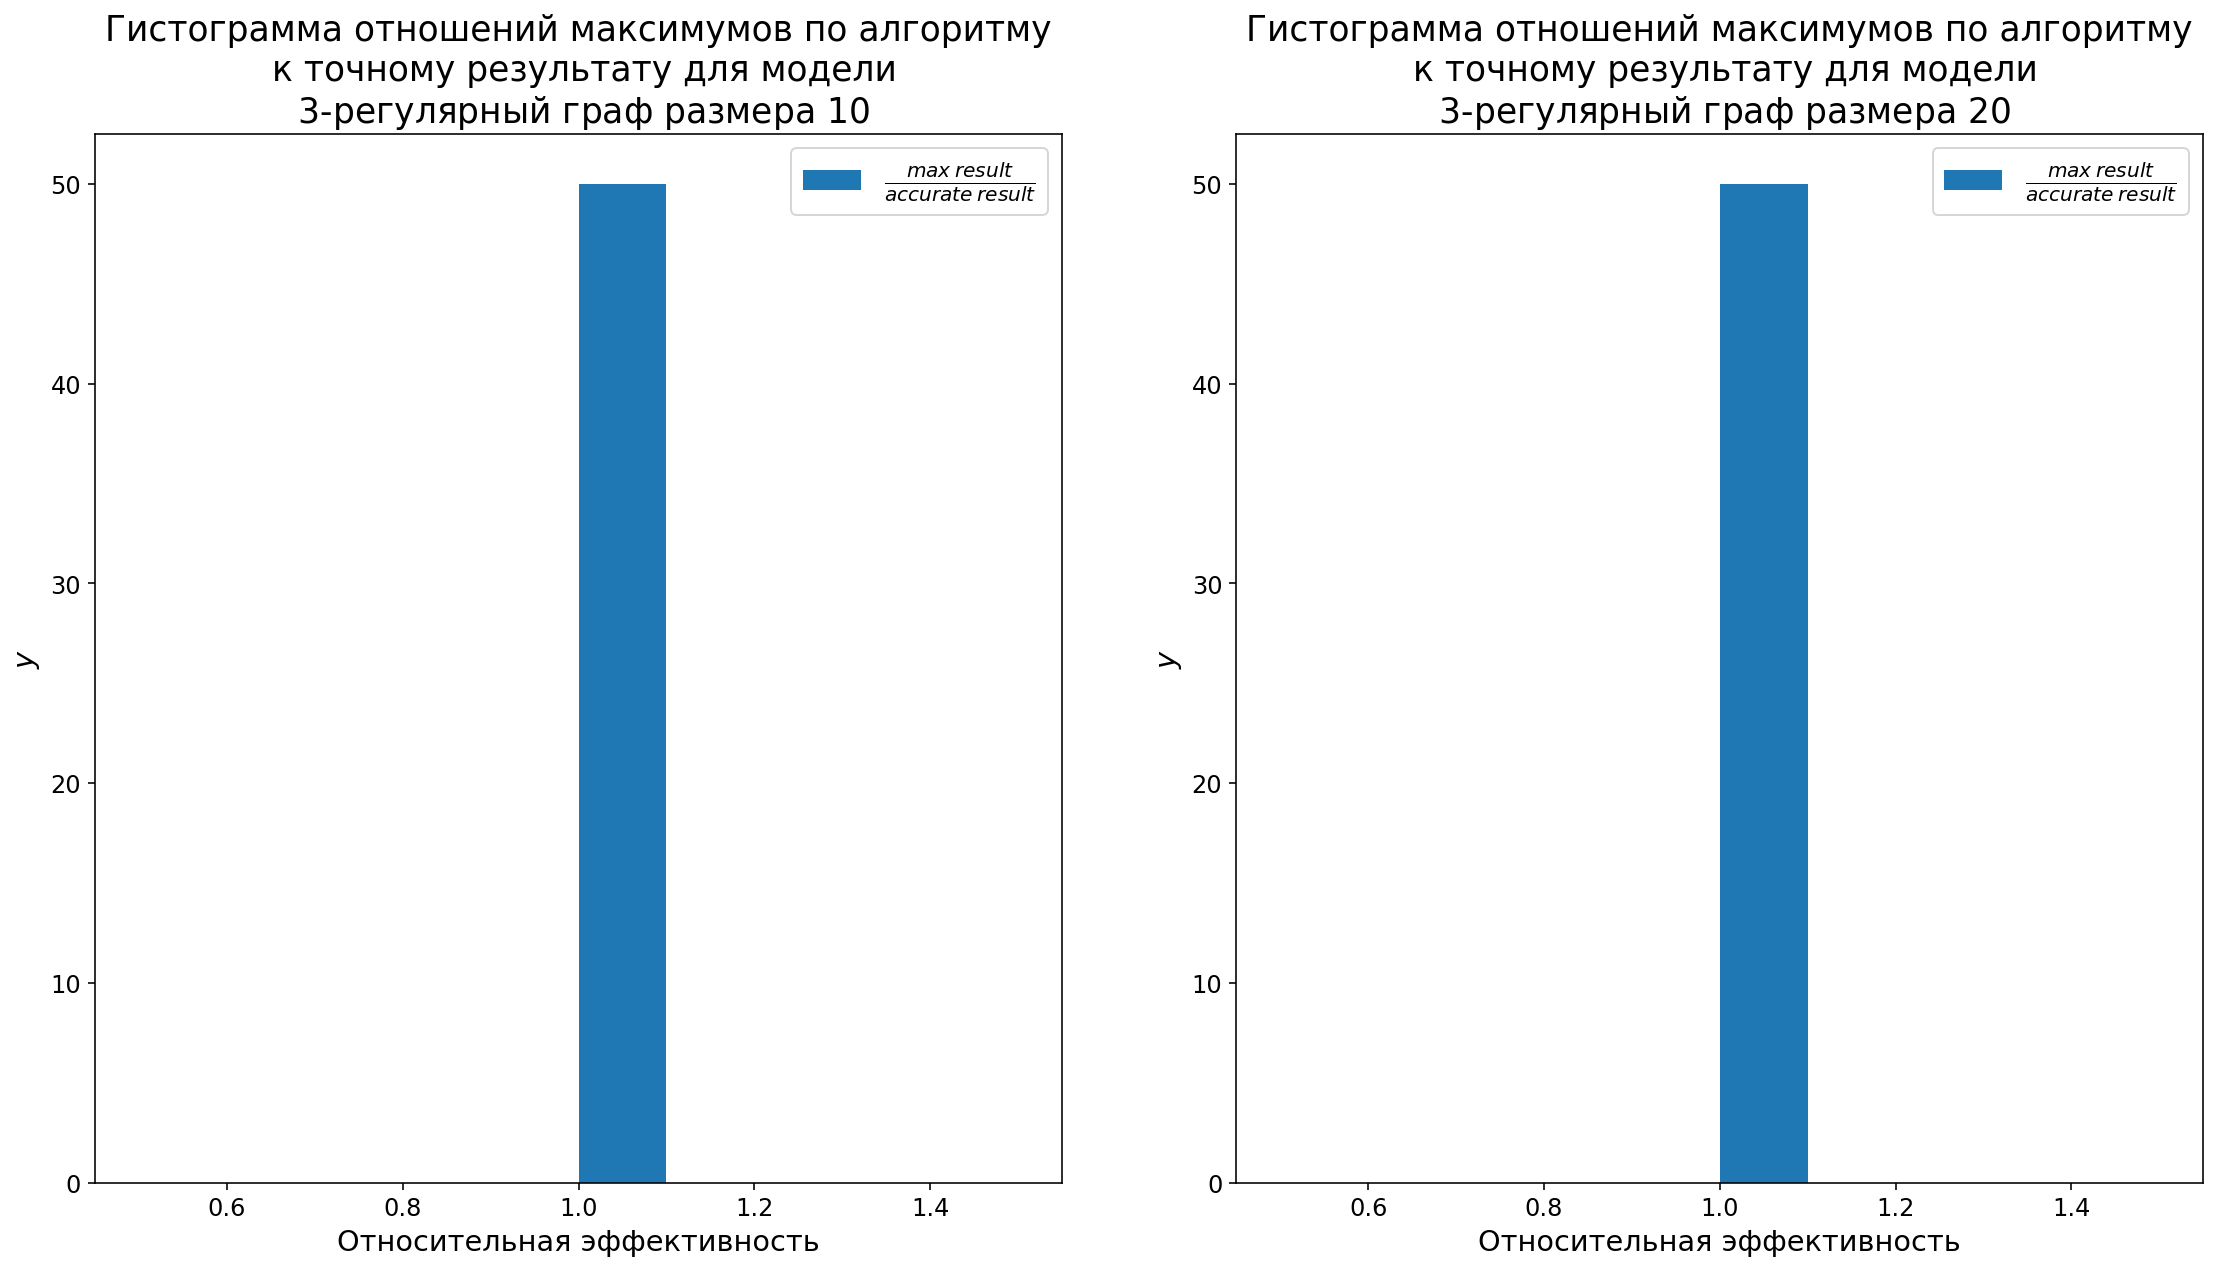

In [67]:
visualize(regular_3_10, regular_3_20, '3-регулярный граф')

,"Средние, лежащие в $[0.878 c^*, c^*]$ для размера $10$, %","Средние, лежащие в $[0.878 c^*, c^*]$ для размера $20$, %"
0,100.0,100.0


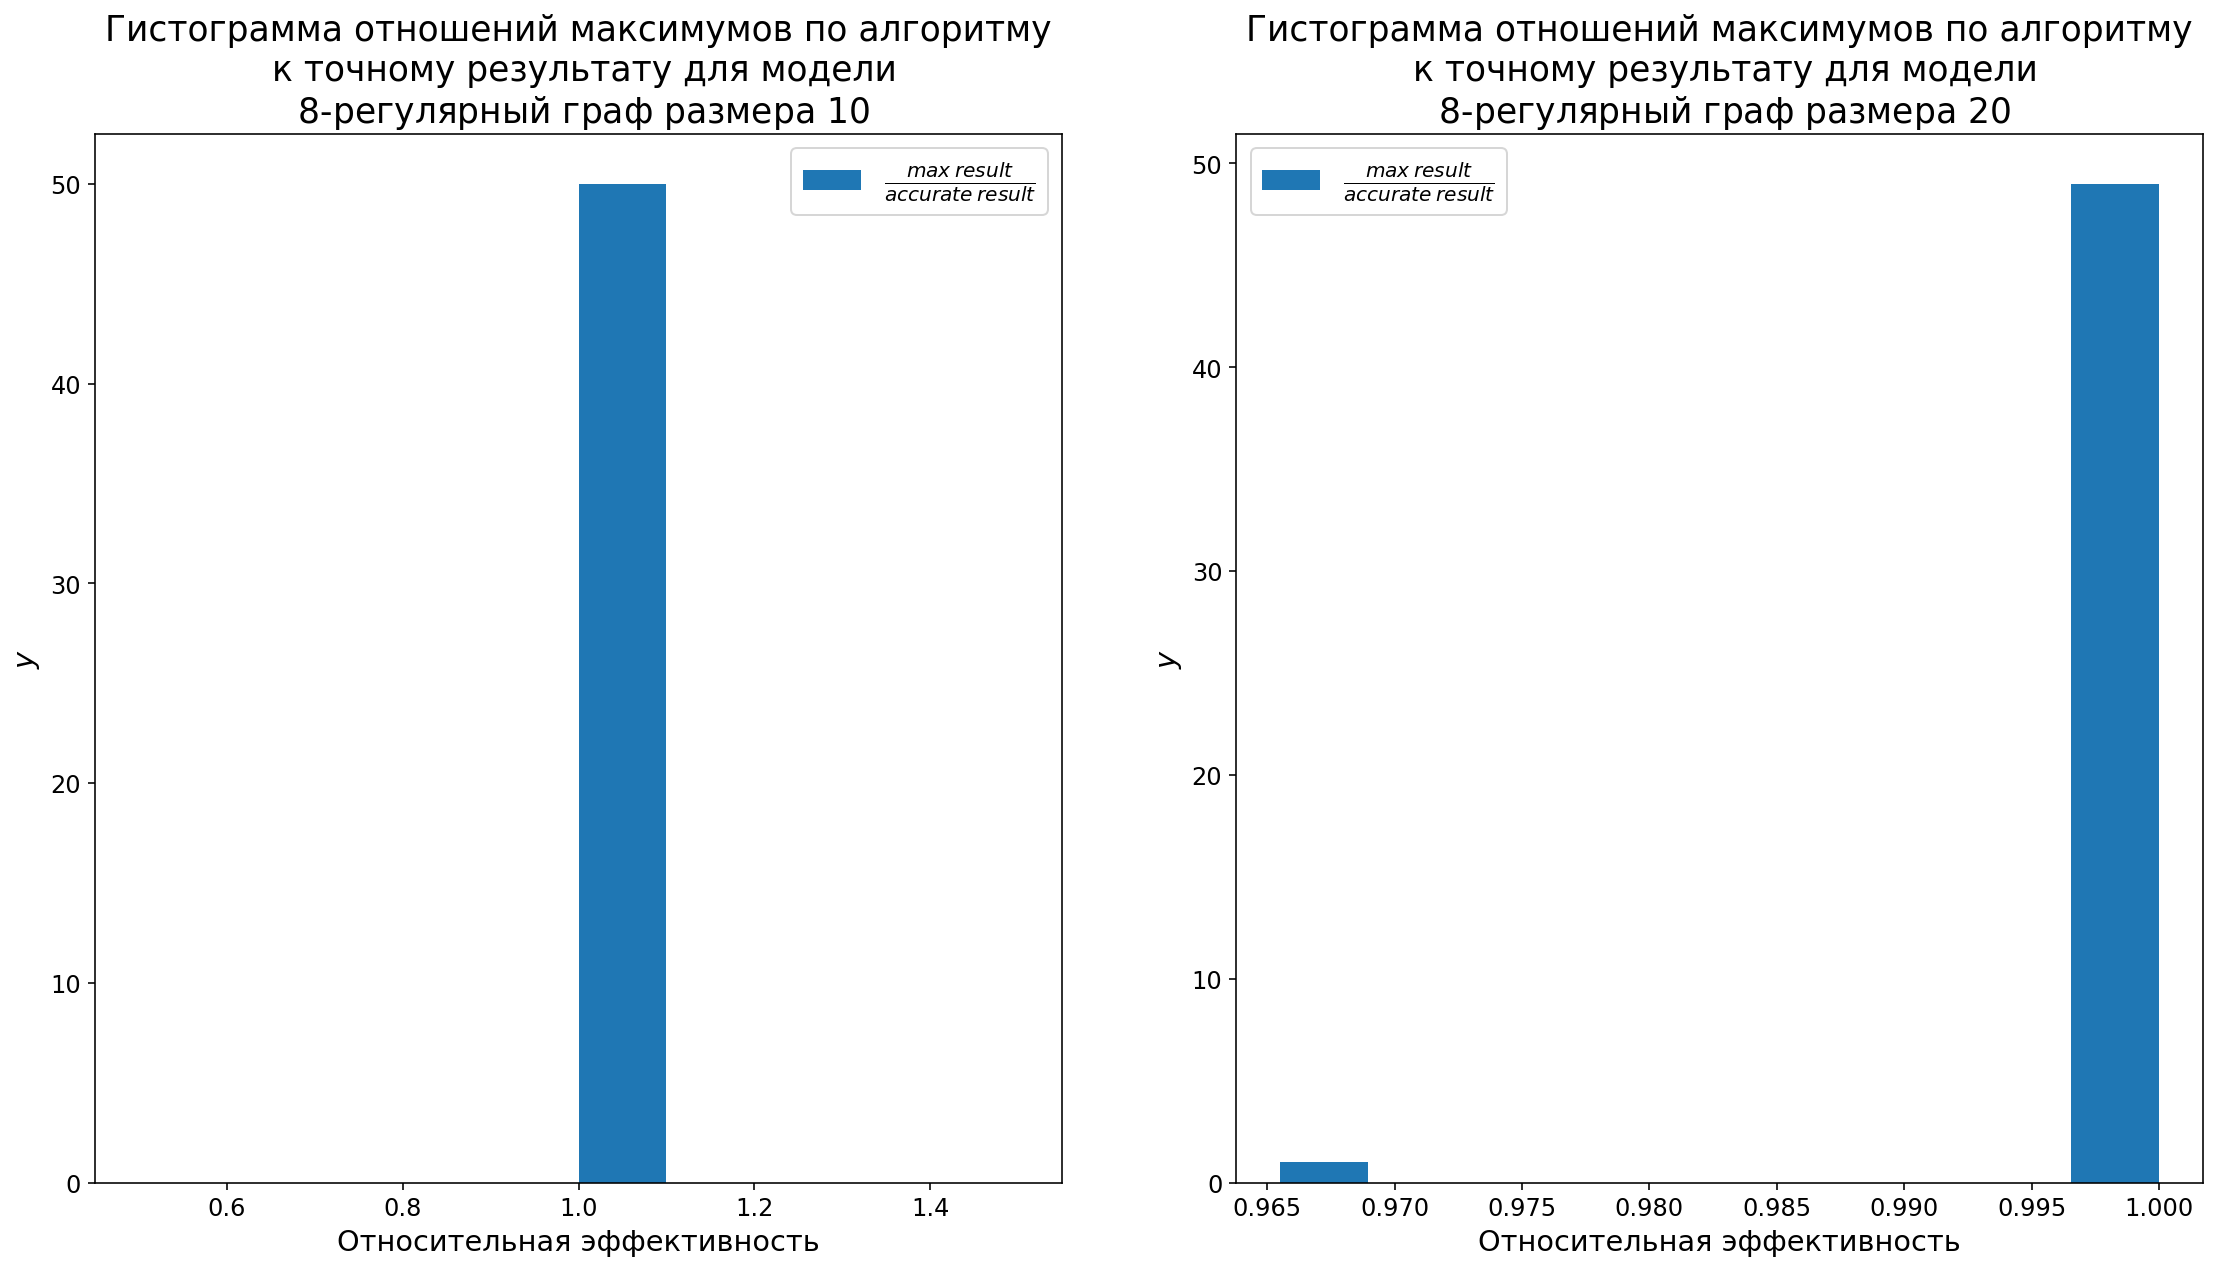

In [68]:
visualize(regular_8_10, regular_8_20, '8-регулярный граф')

ЭРДЕШ-РЕНЬИ

,"Средние, лежащие в $[0.878 c^*, c^*]$ для размера $10$, %","Средние, лежащие в $[0.878 c^*, c^*]$ для размера $20$, %"
0,100.0,100.0


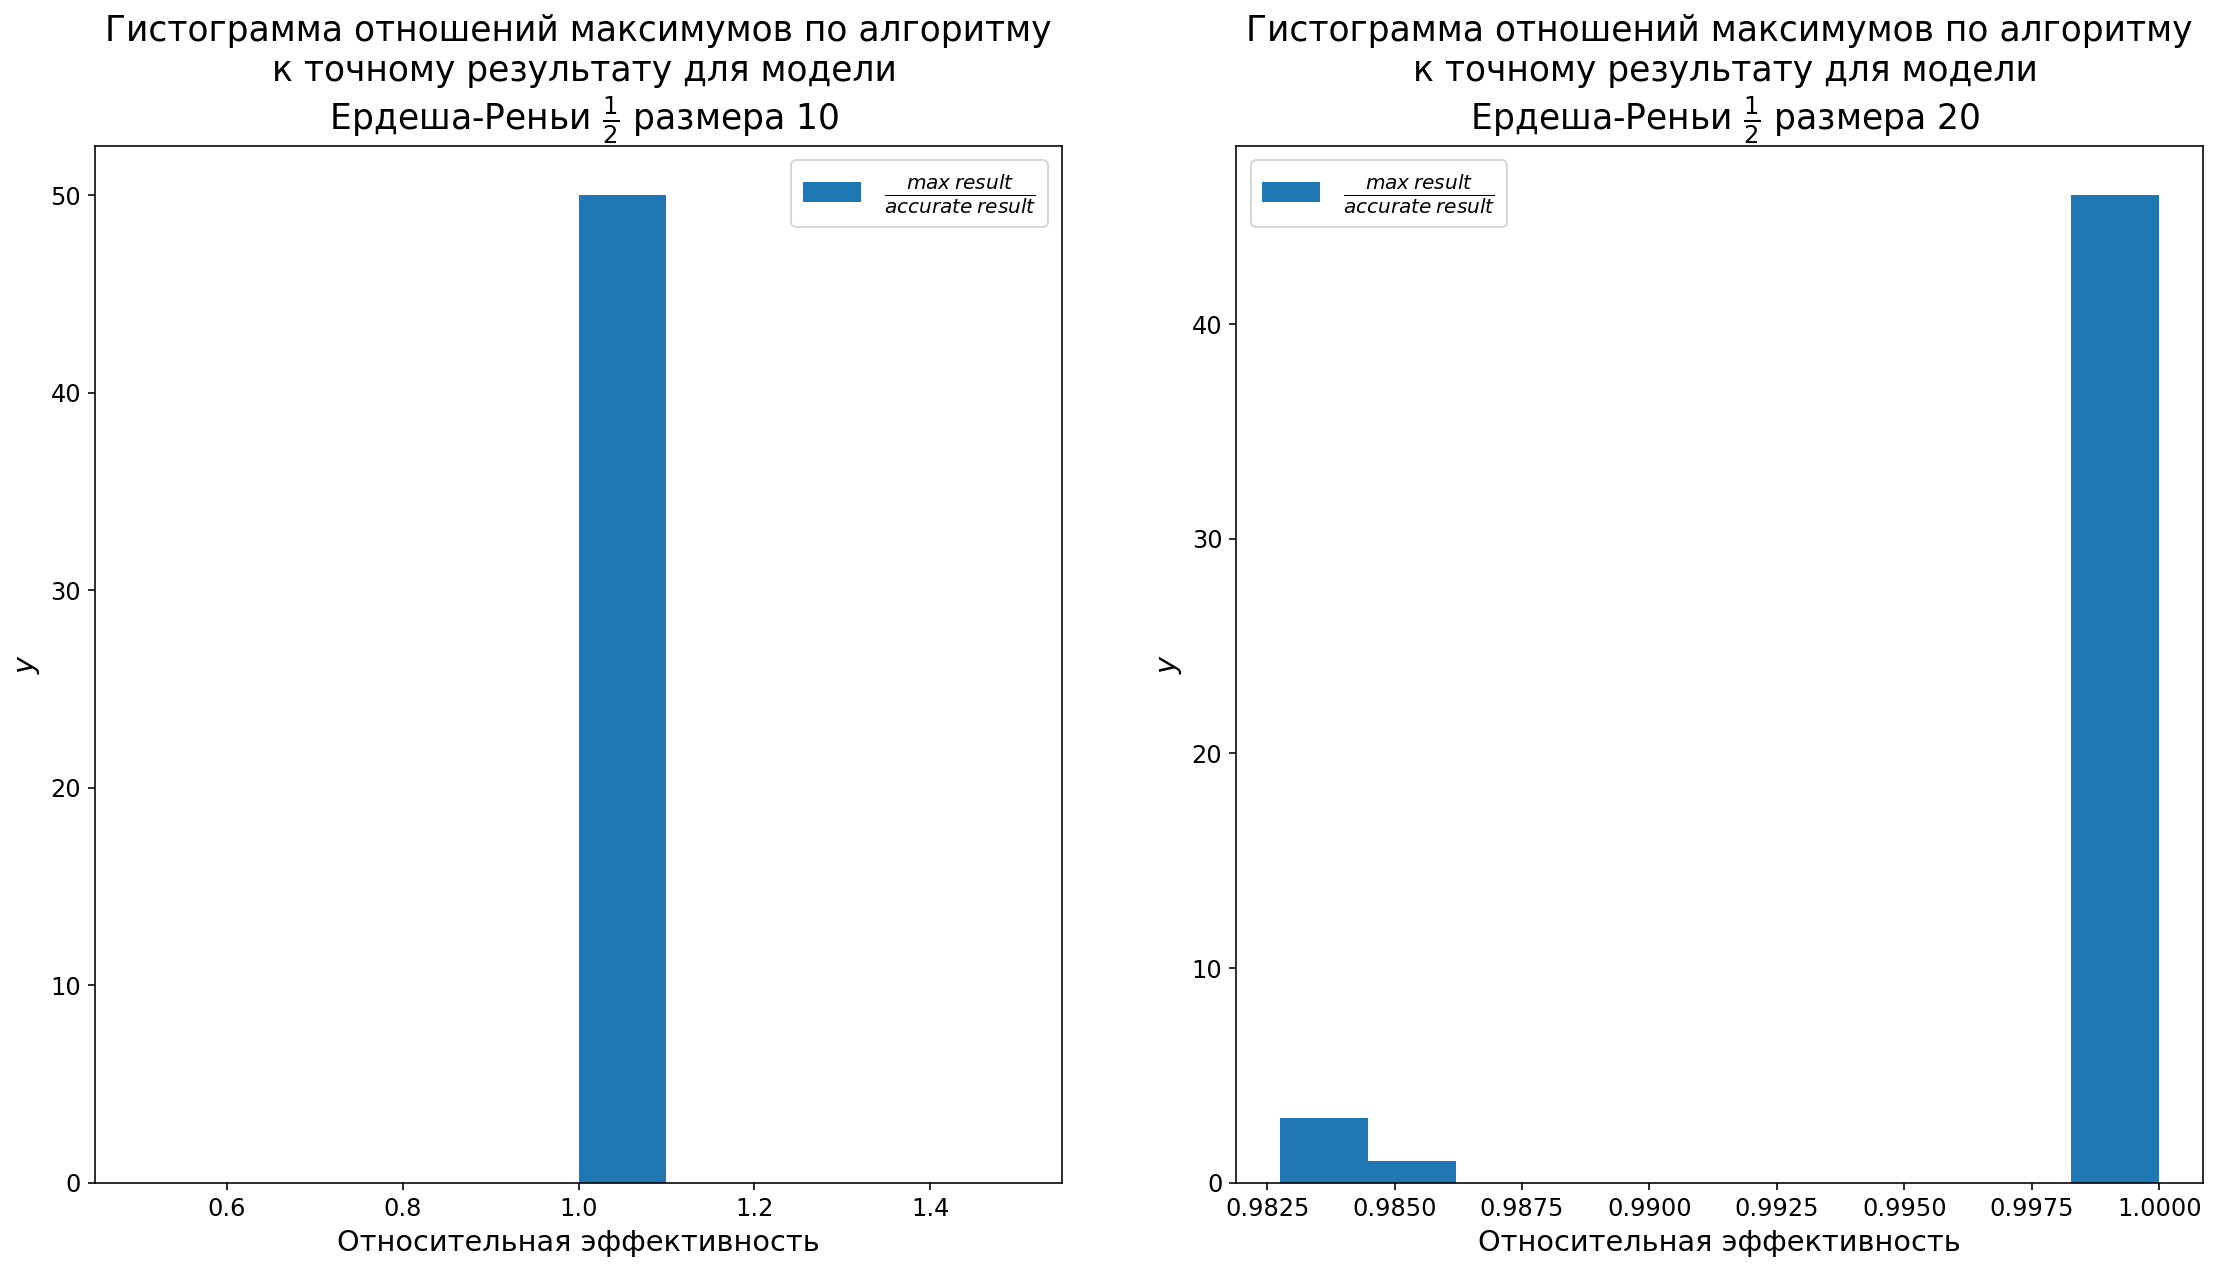

In [69]:
visualize(er_1_2_10, er_1_2_20, 'Ердеша-Реньи $\\frac{1}{2}$')

,"Средние, лежащие в $[0.878 c^*, c^*]$ для размера $10$, %","Средние, лежащие в $[0.878 c^*, c^*]$ для размера $20$, %"
0,100.0,100.0


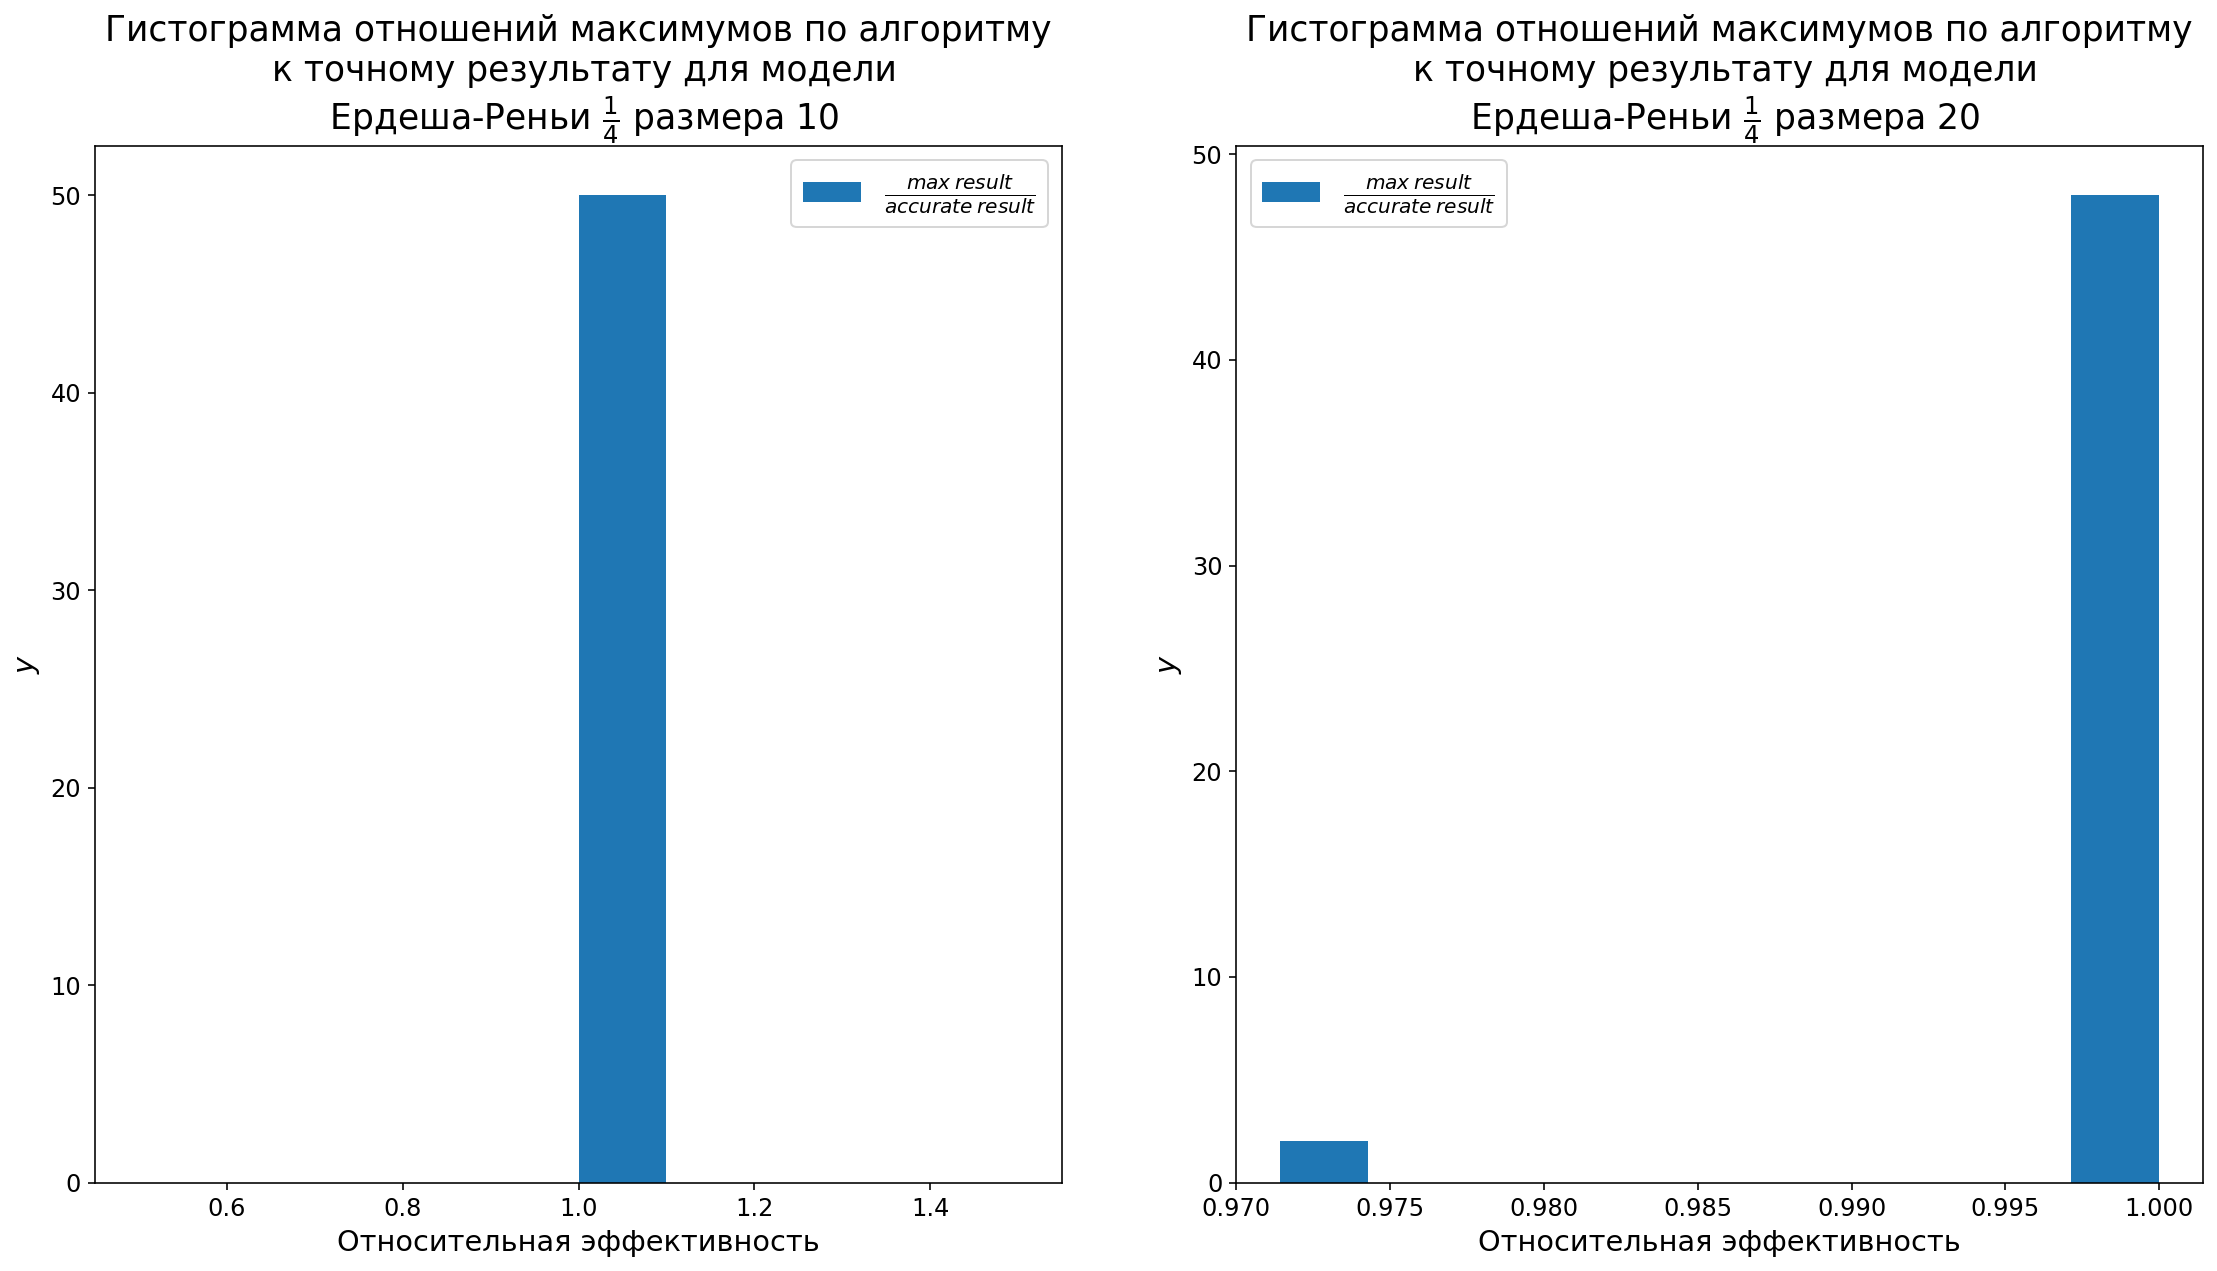

In [70]:
visualize(er_1_4_10, er_1_4_20, 'Ердеша-Реньи $\\frac{1}{4}$')

,"Средние, лежащие в $[0.878 c^*, c^*]$ для размера $10$, %","Средние, лежащие в $[0.878 c^*, c^*]$ для размера $20$, %"
0,100.0,100.0


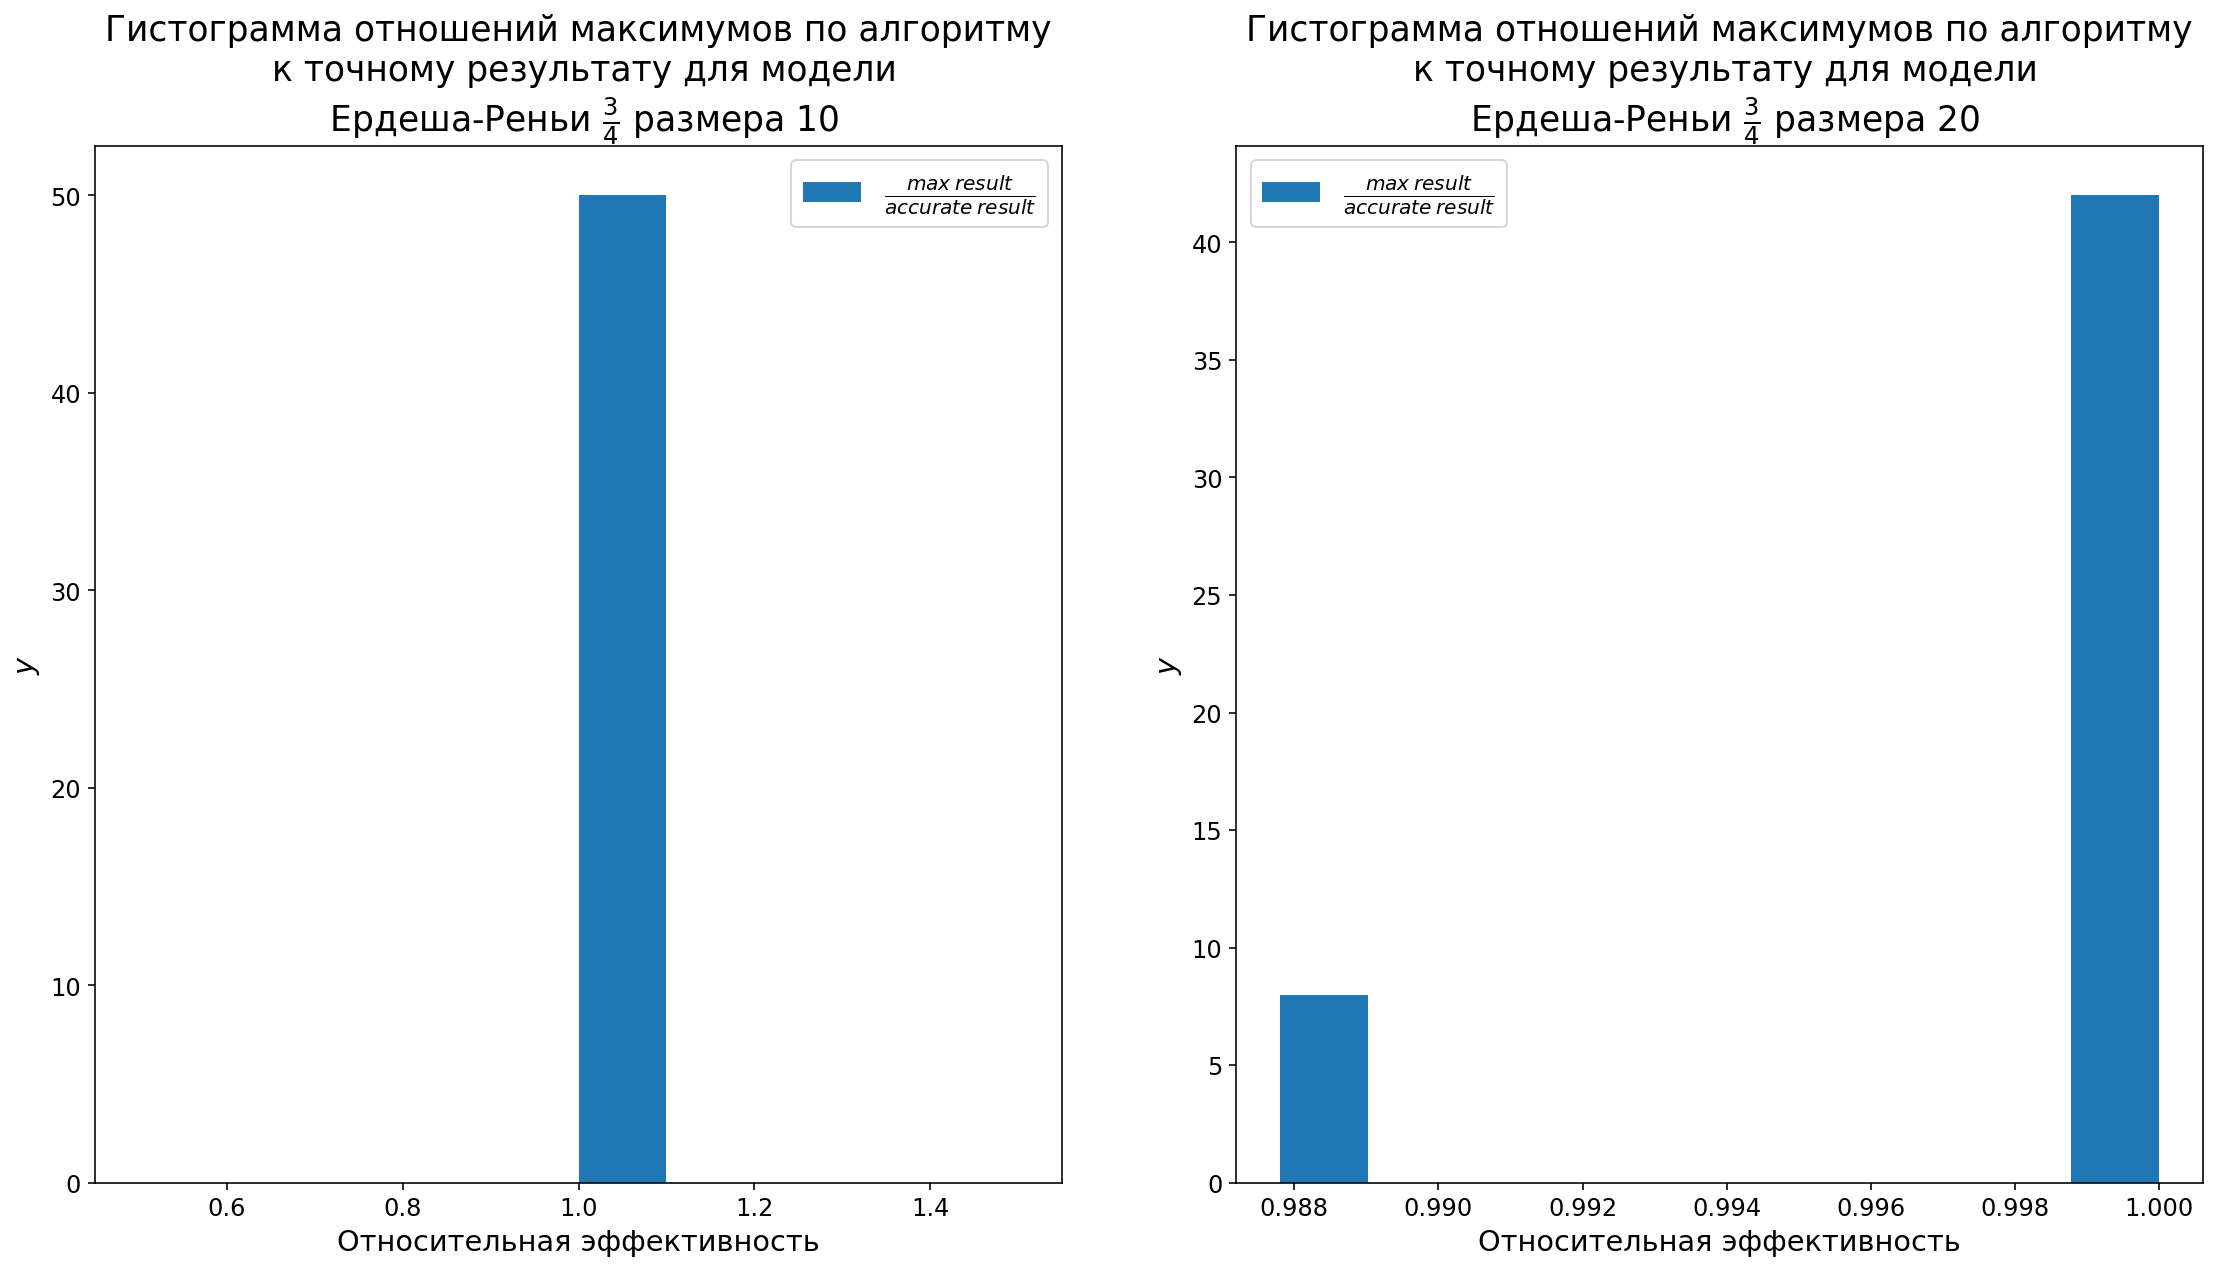

In [71]:
visualize(er_3_4_10, er_3_4_20, 'Ердеша-Реньи $\\frac{3}{4}$')

АЛЬБЕРТ-БАРАБАШИ

,"Средние, лежащие в $[0.878 c^*, c^*]$ для размера $10$, %","Средние, лежащие в $[0.878 c^*, c^*]$ для размера $20$, %"
0,100.0,100.0


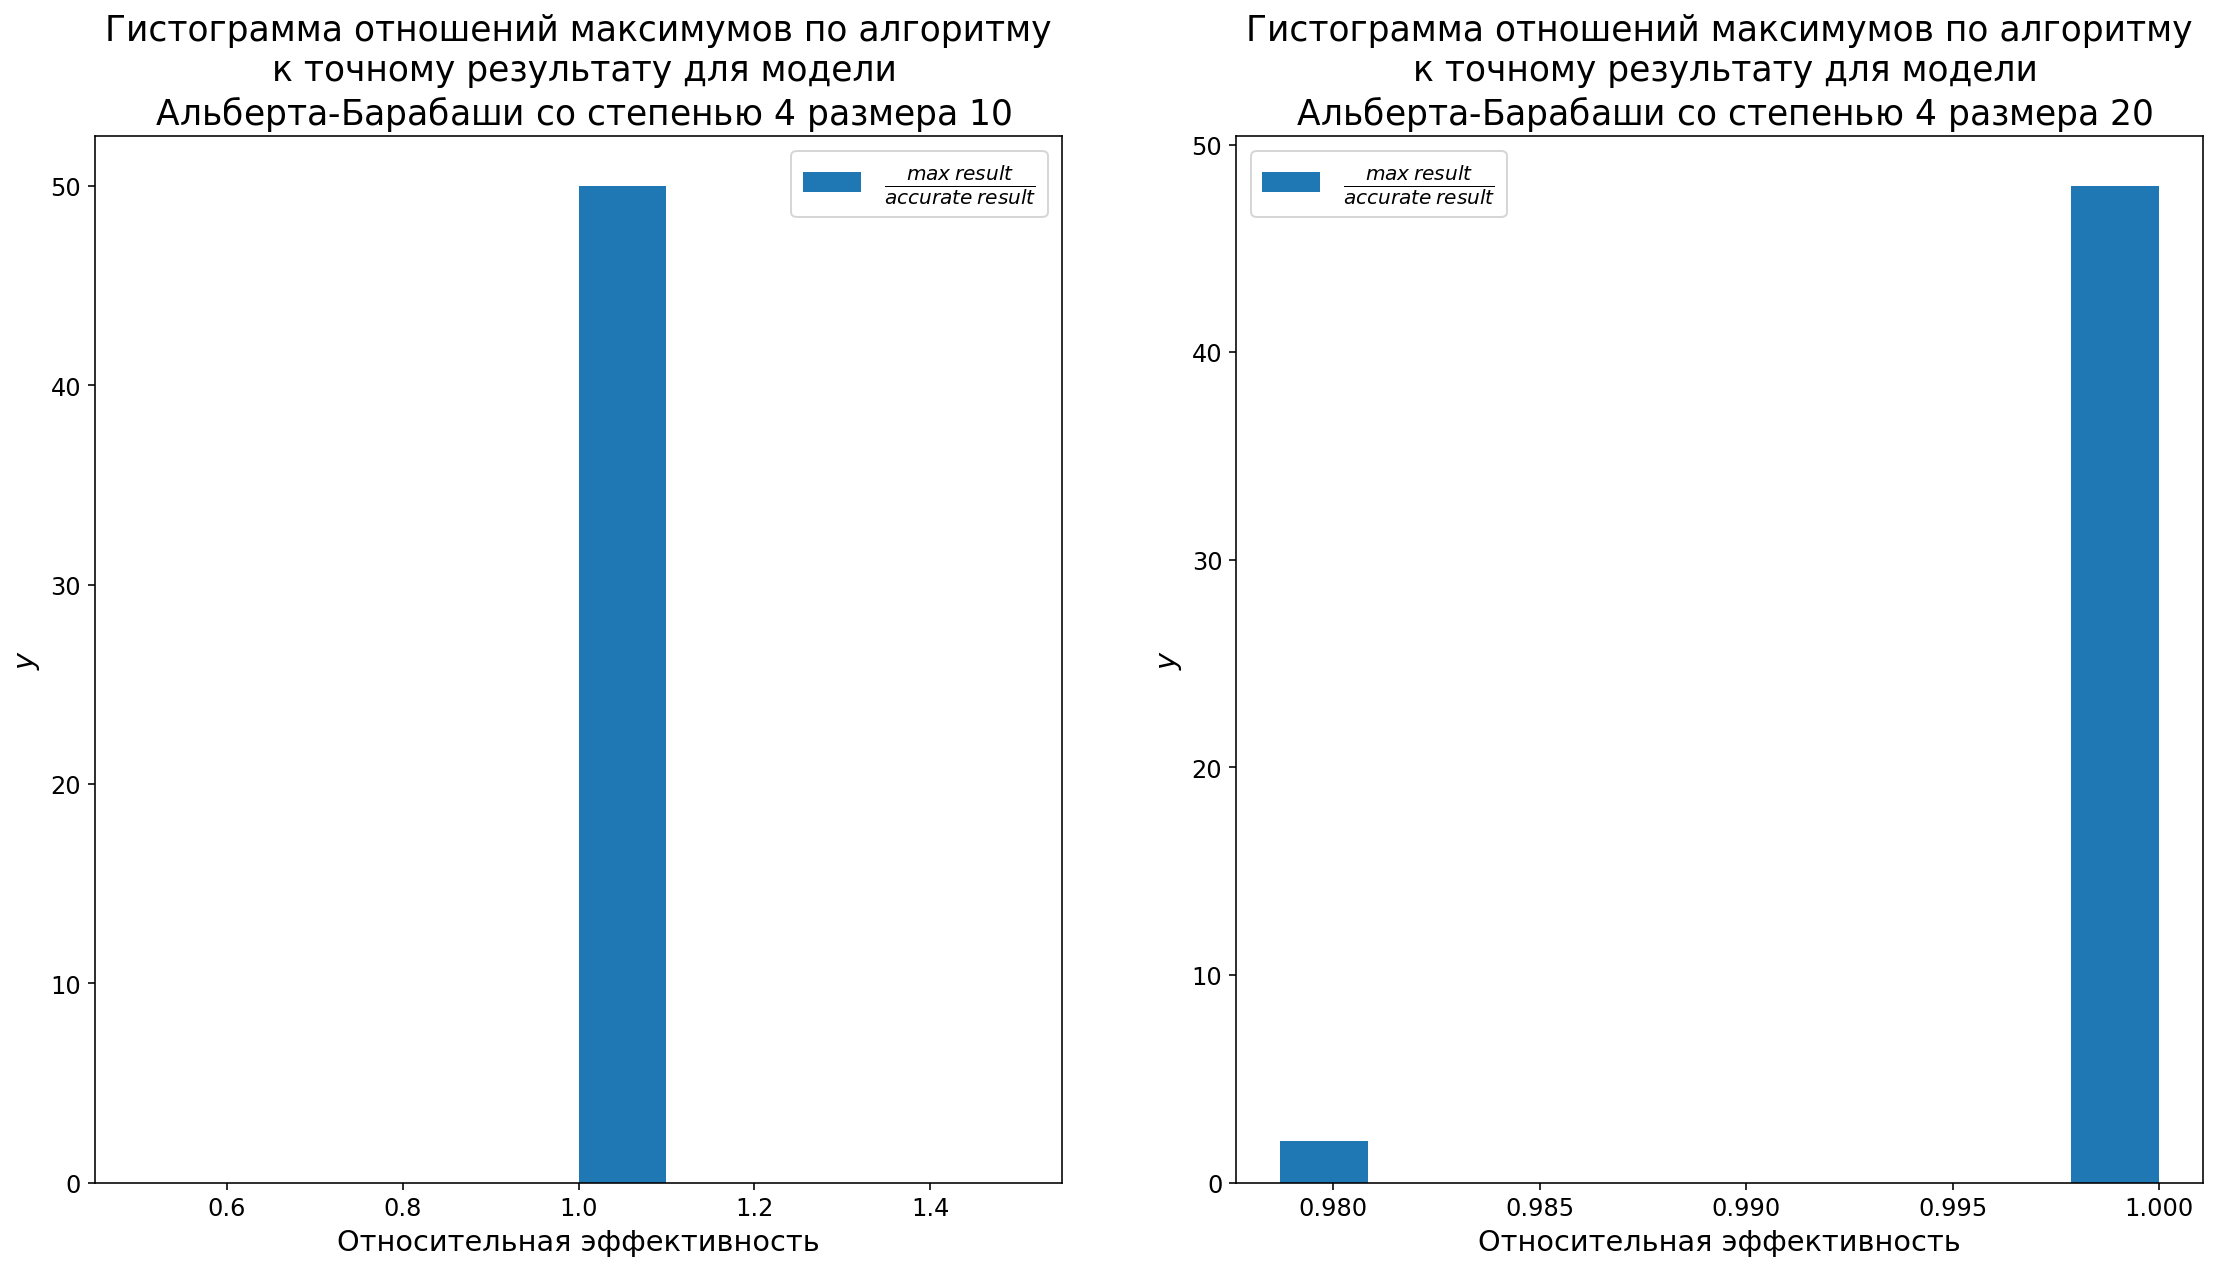

In [72]:
visualize(ba_4_10 ,ba_4_20 , 'Альберта-Барабаши со степенью 4')

,"Средние, лежащие в $[0.878 c^*, c^*]$ для размера $10$, %","Средние, лежащие в $[0.878 c^*, c^*]$ для размера $20$, %"
0,100.0,100.0


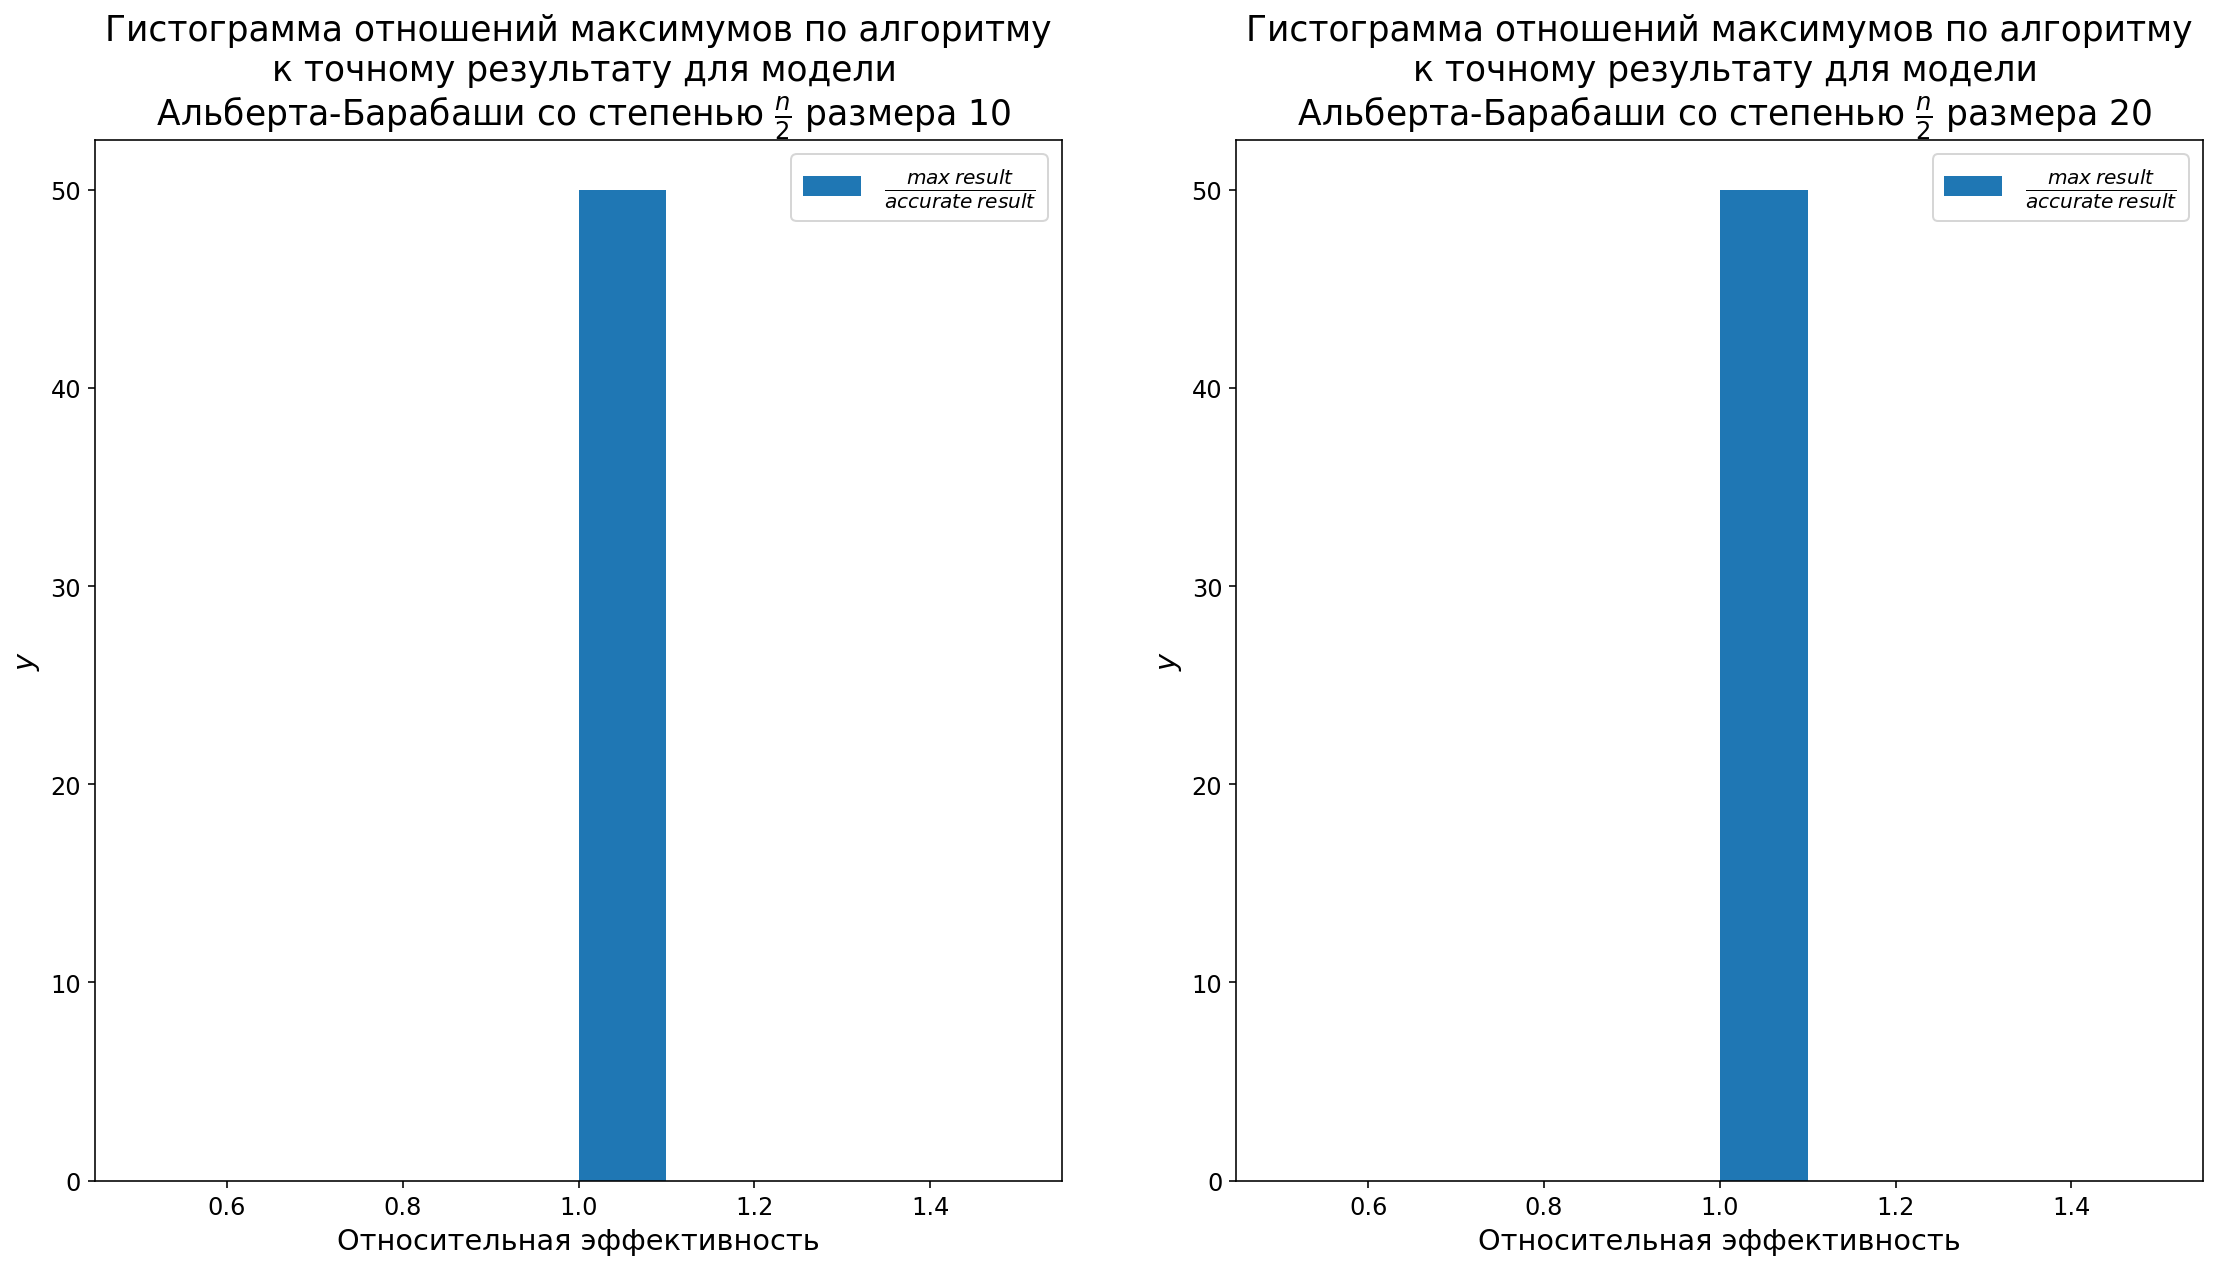

In [73]:
visualize(ba_n_2_10 ,ba_n_2_20 , 'Альберта-Барабаши со степенью $\\frac{n}{2}$')

POWERLAW

,"Средние, лежащие в $[0.878 c^*, c^*]$ для размера $10$, %","Средние, лежащие в $[0.878 c^*, c^*]$ для размера $20$, %"
0,100.0,100.0


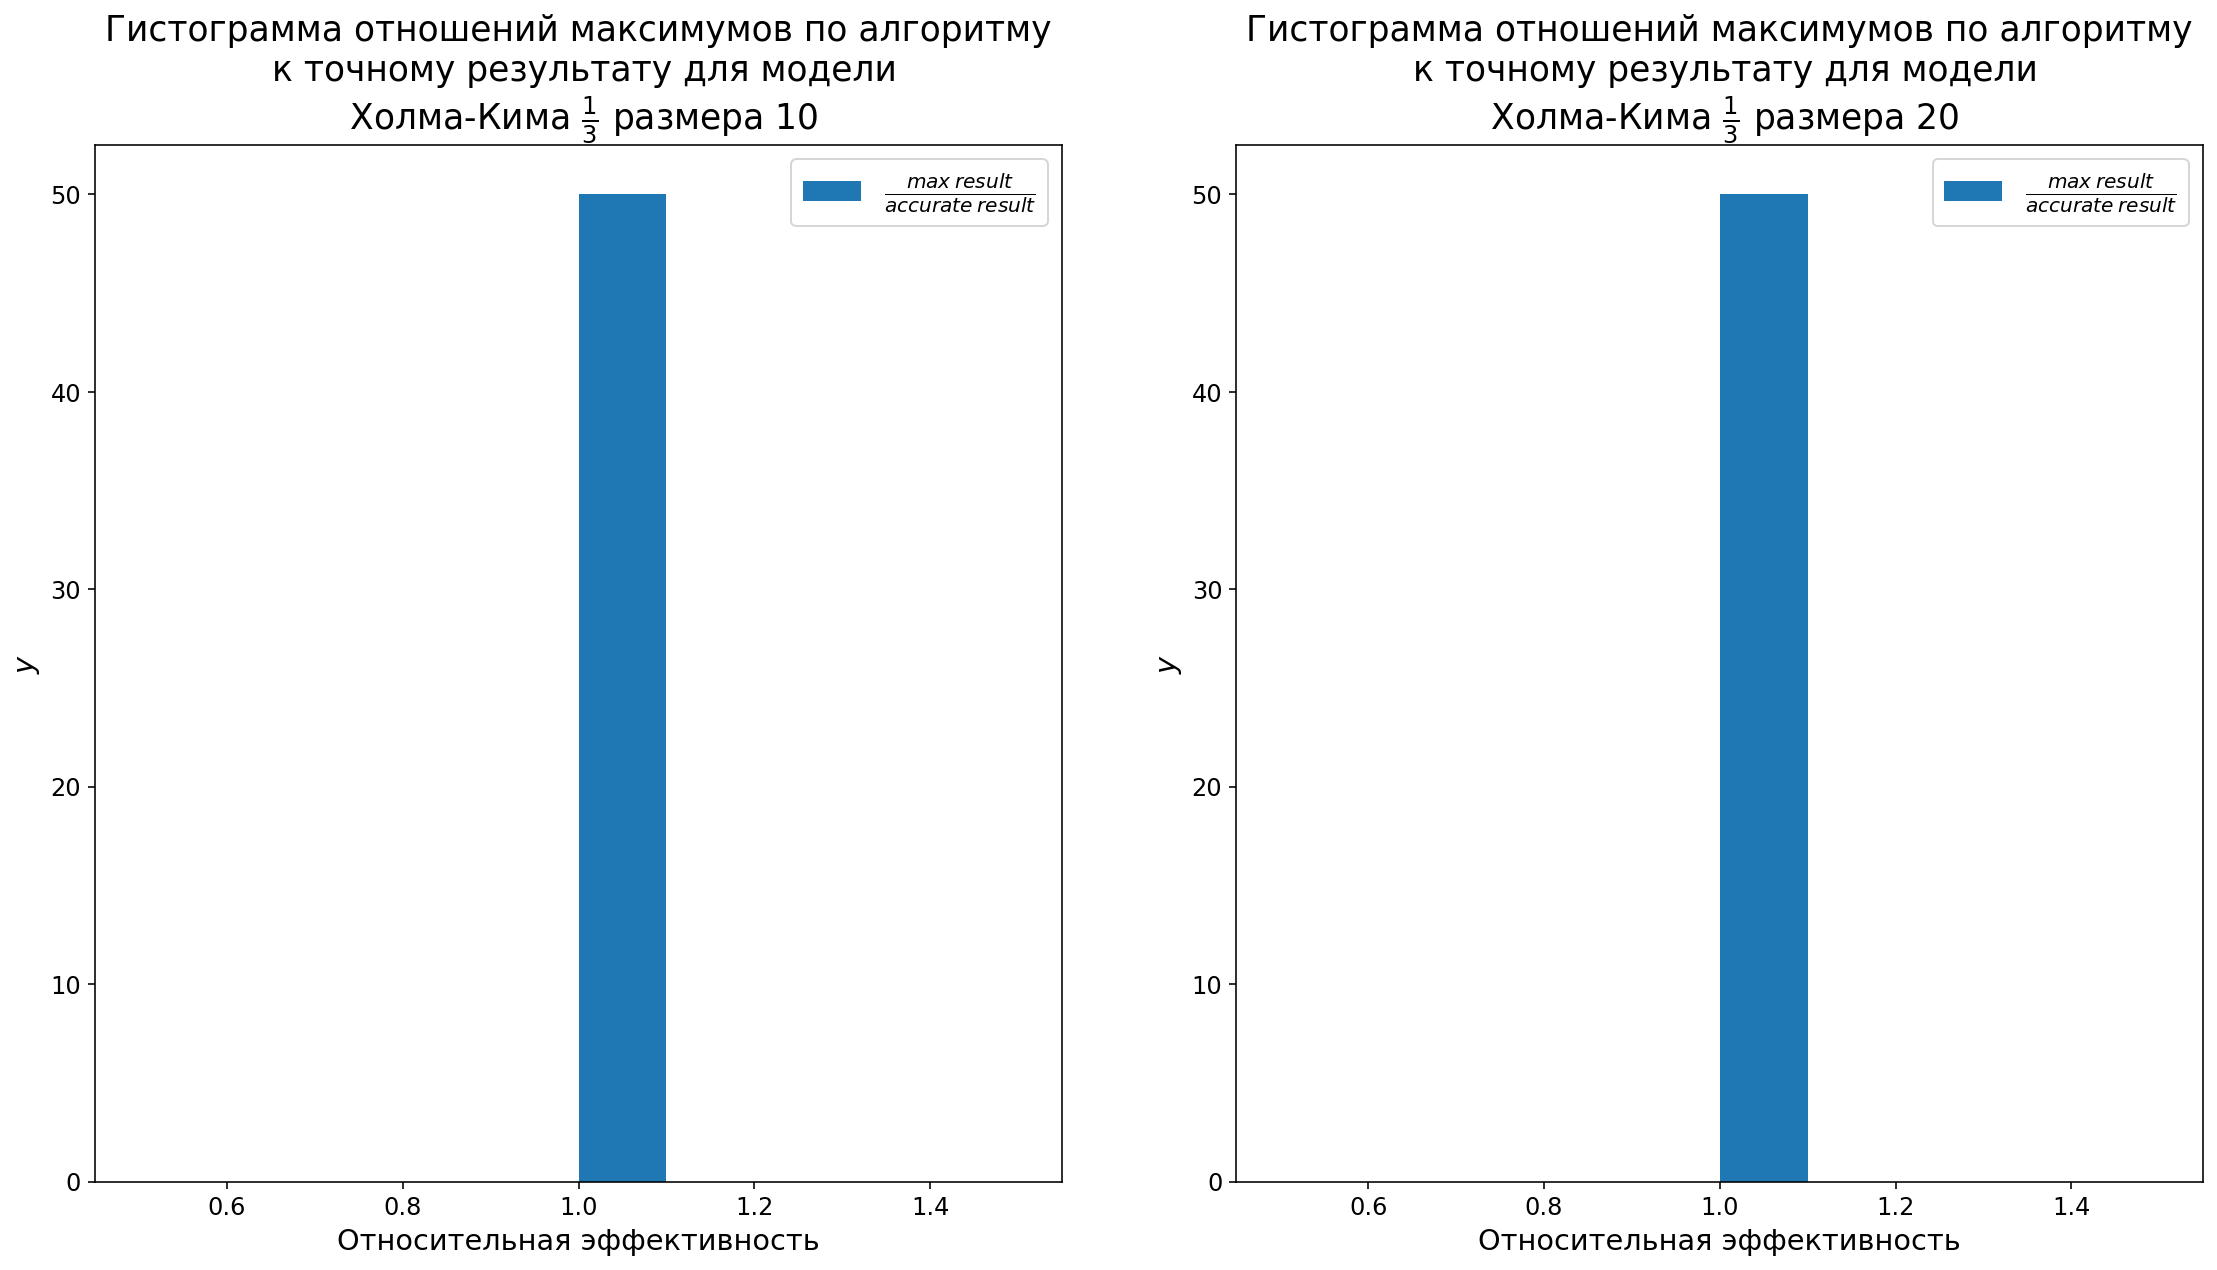

In [74]:
visualize(power_1_3_10, power_1_3_20, 'Холма-Кима $\\frac{1}{3}$')

,"Средние, лежащие в $[0.878 c^*, c^*]$ для размера $10$, %","Средние, лежащие в $[0.878 c^*, c^*]$ для размера $20$, %"
0,100.0,100.0


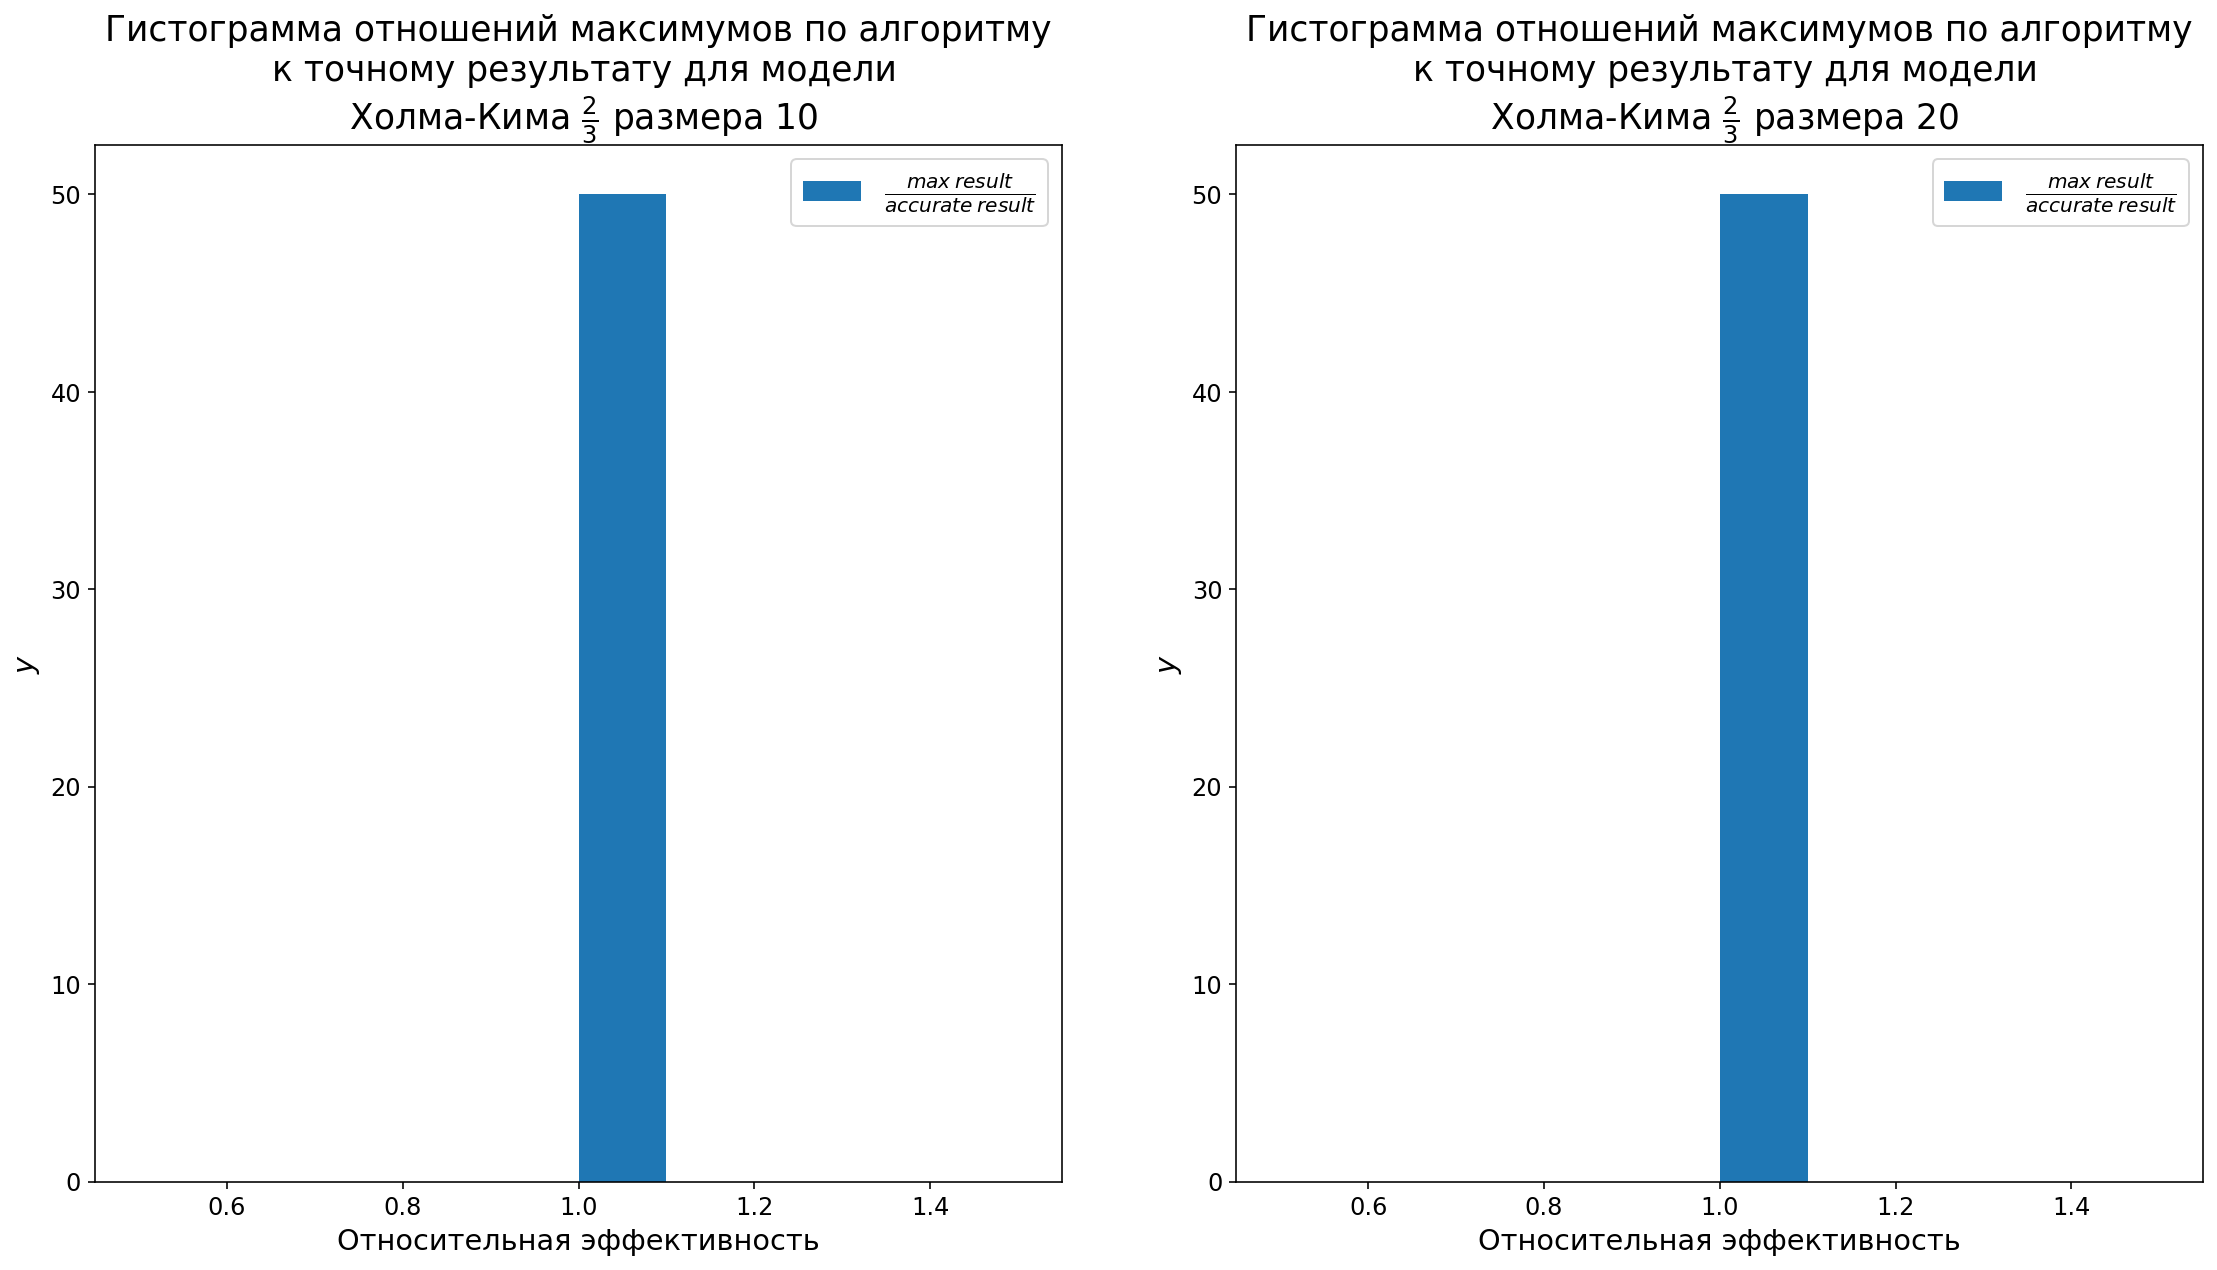

In [75]:
visualize(power_2_3_10, power_2_3_20, 'Холма-Кима $\\frac{2}{3}$')